# Predicting the daily number of coronavirus(COVID-19) cases in Egypt .

## Polynomial Regression model

<hr>

data = 
   Day no.  Cases    Date
0        0      1  Feb 14
1        1      1  Feb 15
2        2      1  Feb 16
3        3      1  Feb 17
4        4      1  Feb 18
5        5      1  Feb 19
6        6      1  Feb 20
7        7      1  Feb 21
8        8      1  Feb 22
9        9      1  Feb 23
................................................
data.describe = 
         Day no.        Cases
count  52.000000    52.000000
mean   25.500000   231.307692
std    15.154757   320.054746
min     0.000000     1.000000
25%    12.750000     1.000000
50%    25.500000    59.500000
75%    38.250000   375.000000
max    51.000000  1173.000000
................................................
data graph :


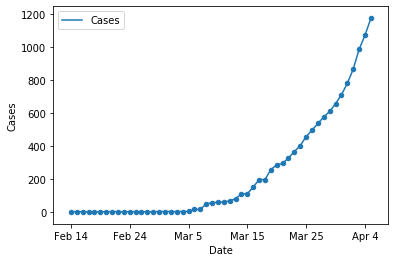

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', header=None, names=['Day no.', 'Cases', 'Date'])

print('data = ')
print(data.head(10) )
print('................................................')
print('data.describe = ')
print(data.describe())
print('................................................')
print('data graph :')
ax = plt.gca()
data.plot(kind='line', x='Date', y='Cases', ax=ax)
data.plot(kind='scatter', x='Date', y='Cases', ax=ax)

<hr>

> The graph data seems to be polynomial on the form :
$$y = {\theta}_0 + {\theta}_1{x} + {\theta}_1{x}^2 + ..... + {\theta}_n{x}^n$$
> I have tried several values for n until I found that the best order is 6  : 
$$y = {\theta}_0 + {\theta}_1{x} + {\theta}_1{x}^2 + ..... + {\theta}_6{x}^6$$




* **Separate X (training data) from y (target variable)**
* **Adding ones before the data (representing ${X}^0)$** 

In [2]:
order = 6
cols = data.shape[1]
rows = data.shape[0]
x = np.array(data.iloc[:,0:cols-2]).flatten().T
ones=[[1.0 for i in range(rows)]]
ones.extend( x**i for i in range(1,order+1))
X = pd.DataFrame(data = ones)
y = data.iloc[:,cols-2:cols-1]
print('input data = \n' ,X)
print('................................................')
print('output data = \n' ,y )

input data = 
     0    1     2      3       4        5        6         7         8   \
0  1.0  1.0   1.0    1.0     1.0      1.0      1.0       1.0       1.0   
1  0.0  1.0   2.0    3.0     4.0      5.0      6.0       7.0       8.0   
2  0.0  1.0   4.0    9.0    16.0     25.0     36.0      49.0      64.0   
3  0.0  1.0   8.0   27.0    64.0    125.0    216.0     343.0     512.0   
4  0.0  1.0  16.0   81.0   256.0    625.0   1296.0    2401.0    4096.0   
5  0.0  1.0  32.0  243.0  1024.0   3125.0   7776.0   16807.0   32768.0   
6  0.0  1.0  64.0  729.0  4096.0  15625.0  46656.0  117649.0  262144.0   

         9   ...            42            43            44            45  \
0       1.0  ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1       9.0  ...  4.200000e+01  4.300000e+01  4.400000e+01  4.500000e+01   
2      81.0  ...  1.764000e+03  1.849000e+03  1.936000e+03  2.025000e+03   
3     729.0  ...  7.408800e+04  7.950700e+04  8.518400e+04  9.112500e+04   
4    6561.0 

<hr>

### Compute theta using normal equation :

> ${\theta} = ({X}_T{X})^{-1}{X}^T{y} $

In [3]:
X = np.matrix(X.values).T
y = np.matrix(y.values)

theta = np.matrix(np.linalg.pinv((X.T)*X)*(X.T)*y)

X = X.T
print('X \n',X)
print('X.shape = ' , X.shape)
print('theta \n',theta)
print('theta.shape = ' , theta.shape)
print('y \n',y)
print('y.shape = ' , y.shape)

X 
 [[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.00000000e+00 3.00000000e+00
  4.00000000e+00 5.00000000e+00 6.00000000e+00 7.00000000e+00
  8.00000000e+00 9.00000000e+00 1.00000000e+01 1.10000000e+01
  1

<hr>

### Get best fit line :

$${f} = {X}{\theta}$$

In [4]:
f = theta[0,0]
for i in range(1, len(theta)):            
    f += theta[i,0] * X[i]
f=np.array(f).flatten()
print('f \n',f)
print('f.shape = ' , f.shape)

f 
 [-2.40717612e-05 -2.86187579e-02 -1.95234044e-01 -5.85405231e-01
 -1.24087373e+00 -2.16561549e+00 -3.33151745e+00 -4.68370194e+00
 -6.14549911e+00 -7.62306730e+00 -9.00966150e+00 -1.01895497e+01
 -1.10415771e+01 -1.14423790e+01 -1.12692405e+01 -1.04026051e+01
 -8.72823134e+00 -6.13899675e+00 -2.53635031e+00  2.16858726e+00
  8.05427513e+00  1.51883562e+01  2.36276125e+01  3.34182735e+01
  4.45966752e+01  5.71902723e+01  7.12190016e+01  8.66969982e+01
  1.03634663e+02  1.22041082e+02  1.41926800e+02  1.63306941e+02
  1.86204687e+02  2.10655105e+02  2.36709327e+02  2.64439080e+02
  2.93941573e+02  3.25344730e+02  3.58812778e+02  3.94552192e+02
  4.32817977e+02  4.73920322e+02  5.18231590e+02  5.66193668e+02
  6.18325664e+02  6.75231965e+02  7.37610635e+02  8.06262172e+02
  8.82098620e+02  9.66153024e+02  1.05958924e+03  1.16371212e+03]
f.shape =  (52,)


<hr>

### Draw the prediction graph :

Text(0.5, 1.0, 'Predicted Cases vs. Day no.')

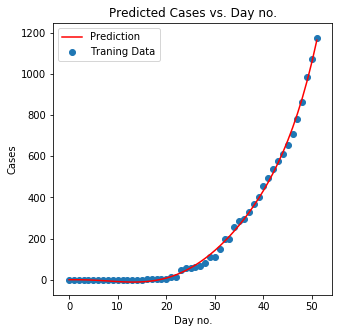

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['Day no.'], data['Cases'], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Day no.')
ax.set_ylabel('Cases')
ax.set_title('Predicted Cases vs. Day no.')

<hr>

### Predict cases in specific comming date :

In [6]:
from datetime import datetime

#convert date to specific Day no.
def convertDay(date:datetime):
    delta = str(date - datetime(2020, 4, 5))
    if delta[0] == '0':
        return 51
    i =0
    dt = ''
    while(delta[i]!=' '):
        dt+=delta[i]
        i+=1
    return int(dt) + 51


def predict(DayNo):
    NOofCases = theta[0,0]
    for i in range(1, len(theta)):            
        NOofCases += theta[i,0] * DayNo**i
    return int(NOofCases)
   

#### Predicted no. of Cases in all days in current week :

In [7]:

days = [datetime(2020, 4, i) for i in range(4,10) ]
Cases = [predict(convertDay(days[i])) for i in range(6)]
for i in range(len(days)):
    days[i]=days[i].strftime('%B %d')

        Day  No. of Cases
0  April 04          1059
1  April 05          1163
2  April 06          1279
3  April 07          1410
4  April 08          1555
5  April 09          1718
.........................................


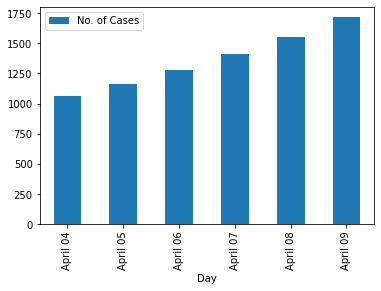

In [8]:
import matplotlib.dates as mdates 
predictedData = pd.DataFrame({'Day':days,'No. of Cases':Cases})
print(predictedData)
print('.........................................')

predictedData.plot(kind='bar', x='Day', y='No. of Cases')
